**This is the final 5 fold program... data is splitted manually and then 5 fold cross validation performed moreover 20% of data is reserved for testing phase apart from 5 fold CV which is tested thereafter.**

In [ ]:
# importing the libraries

import time
import numpy as np
from datetime import datetime
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_validate, cross_val_predict, GroupKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, make_scorer
from matplotlib.font_manager import FontProperties

from collections import Counter
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# importing all models

import time
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# creating the model function
def get_models():
	models = list()
	models.append(LogisticRegression(max_iter=1000))
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(KNeighborsClassifier(n_neighbors=6))
	models.append(DecisionTreeClassifier())
	models.append(LinearSVC(dual=False))
	models.append(SVC(C=100, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=True, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 45))
	models.append(GaussianNB())
	models.append(AdaBoostClassifier(n_estimators=100, learning_rate=1))
	models.append(RandomForestClassifier())
	models.append(GradientBoostingClassifier())
	models.append(QuadraticDiscriminantAnalysis())
	return models

In [ ]:
# # Importing the raw dataset and perform label encoding

# dataset = pd.read_excel('/content/100 percent data.xlsx', sheet_name='Sheet1')

# for f in dataset.columns:
#     if dataset[f].dtype == 'object':
#         lbl_enc = LabelEncoder()
#         dataset[f] = lbl_enc.fit_transform(dataset[f].values)

# feature_columns =   [
#                     'Age-1',
#                     'PoR',
#                     'ES',
#                     'SES',
#                     'Parity',
#                     'Age',
#                     'MC',
#                     'MH',
#                     'Contraception',
#                     'Smoking',
#                     'HR-HPV',
#                     'IL-6',
#                     'IL-1 β',
#                     'TNF-α',
#                     'IL-1RN',
#                     ]

# X = dataset[feature_columns].values
# y = dataset['Label'].values
# X, y = shuffle(X, y)
# X, y = shuffle(X, y)
# print(X.shape)

In [ ]:
# saving the data

# np.save('/content/X5_train.npy', X) # 
# np.save('/content/y5_train.npy', y)

# np.save('/content/X_test.npy', X)
# np.save('/content/y_test.npy', y)

In [ ]:
# loading the manually splitted data

# training data
X1_train = np.load('/content/X1_train.npy')
X2_train = np.load('/content/X2_train.npy')
X3_train = np.load('/content/X3_train.npy')
X4_train = np.load('/content/X4_train.npy')
X5_train = np.load('/content/X5_train.npy')
y1_train = np.load('/content/y1_train.npy')
y2_train = np.load('/content/y2_train.npy')
y3_train = np.load('/content/y3_train.npy')
y4_train = np.load('/content/y4_train.npy')
y5_train = np.load('/content/y5_train.npy')

# validation data
X1_val = np.load('/content/X1_val.npy')
X2_val = np.load('/content/X2_val.npy')
X3_val = np.load('/content/X3_val.npy')
X4_val = np.load('/content/X4_val.npy')
X5_val = np.load('/content/X5_val.npy')
y1_val = np.load('/content/y1_val.npy')
y2_val = np.load('/content/y2_val.npy')
y3_val = np.load('/content/y3_val.npy')
y4_val = np.load('/content/y4_val.npy')
y5_val = np.load('/content/y5_val.npy')

# testing data
X_test = np.load('/content/X_test.npy')
y_test = np.load('/content/y_test.npy')

In [ ]:
# appending the data

XX_train, yy_train, XX_val, yy_val = list(), list(), list(), list()

XX_train.append(X1_train)
XX_train.append(X2_train)
XX_train.append(X3_train)
XX_train.append(X4_train)
XX_train.append(X5_train)
yy_train.append(y1_train)
yy_train.append(y2_train)
yy_train.append(y3_train)
yy_train.append(y4_train)
yy_train.append(y5_train)

XX_val.append(X1_val)
XX_val.append(X2_val)
XX_val.append(X3_val)
XX_val.append(X4_val)
XX_val.append(X5_val)
yy_val.append(y1_val)
yy_val.append(y2_val)
yy_val.append(y3_val)
yy_val.append(y4_val)
yy_val.append(y5_val)

In [ ]:
# calculation of tpr, fpr and auc for drawing ROC separately

def cal_fpr_tpr_auc(X_train, y_train, X_test, y_test, cls):
  model = cls.fit(X_train, y_train)
  yproba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = roc_curve(y_test,  yproba)
  auc = roc_auc_score(y_test, yproba)
  return fpr, tpr, auc

In [ ]:
# So that we can combine the all 12 model ROC into one using fpr, tpr and auc in MS Excel

models = get_models()
for clf in models:
  print('\n', type(clf).__name__)
  FPR, TPR, AUC = list(), list(), list()
  for X_train, y_train, X_test, y_test in zip(XX_train, yy_train, XX_val, yy_val):
    fpr, tpr, auc = cal_fpr_tpr_auc(X_train, y_train, X_test, y_test, clf)
    FPR.append(fpr)
    TPR.append(tpr)
    AUC.append(auc)
  AUC = sum(AUC)/5

Mean AUC of:> LogisticRegression is :> 89.394
Mean AUC of:> RidgeClassifier is :> 89.323
Mean AUC of:> SGDClassifier is :> 84.515
Mean AUC of:> KNeighborsClassifier is :> 82.969
Mean AUC of:> DecisionTreeClassifier is :> 76.747
Mean AUC of:> LinearSVC is :> 89.091
Mean AUC of:> SVC is :> 85.611
Mean AUC of:> GaussianNB is :> 89.298
Mean AUC of:> AdaBoostClassifier is :> 87.823
Mean AUC of:> RandomForestClassifier is :> 88.552
Mean AUC of:> GradientBoostingClassifier is :> 89.399
Mean AUC of:> QuadraticDiscriminantAnalysis is :> 87.934


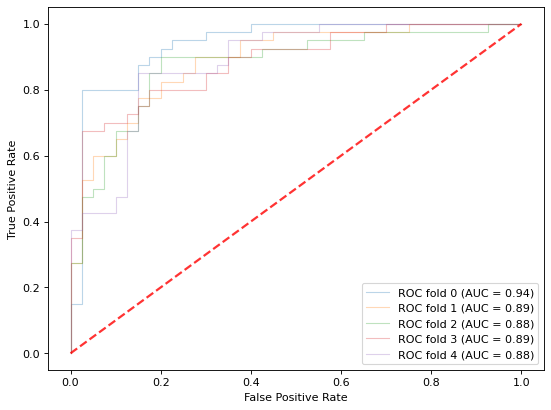

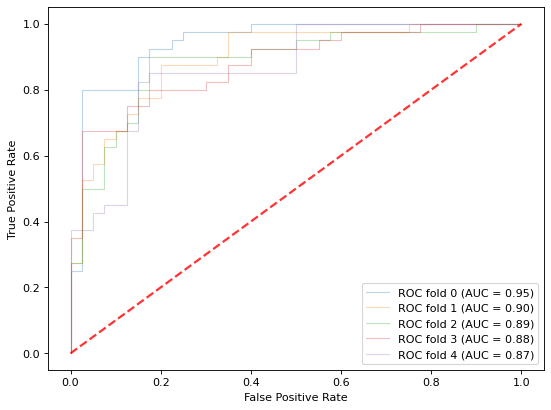

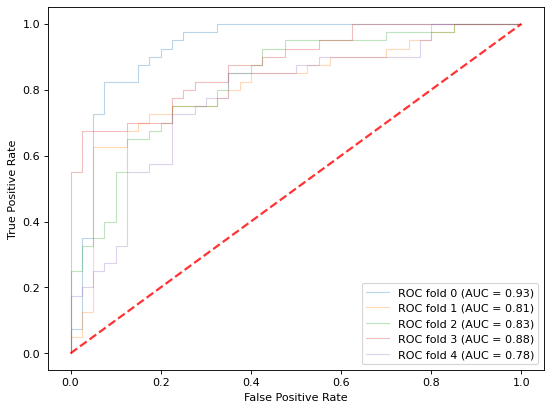

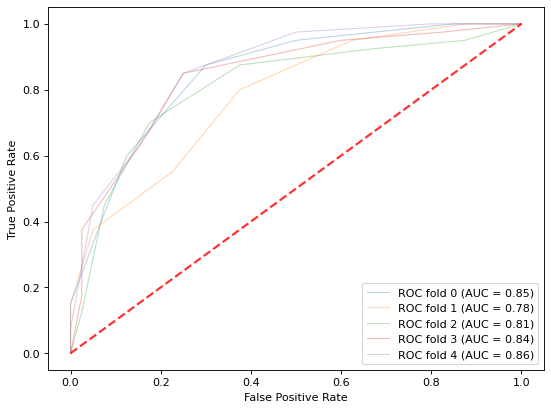

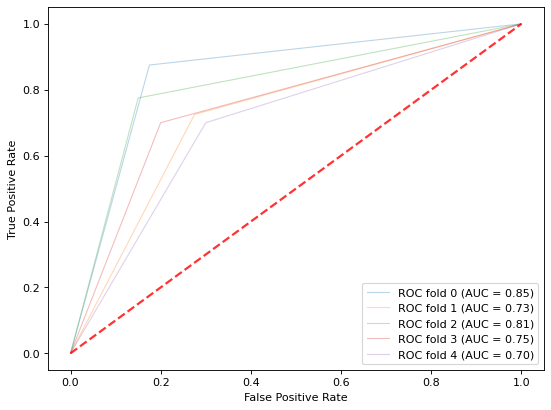

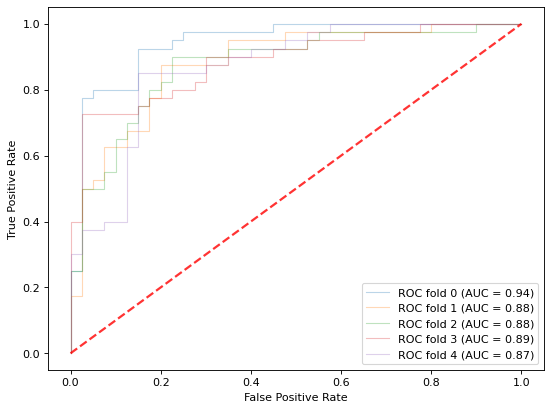

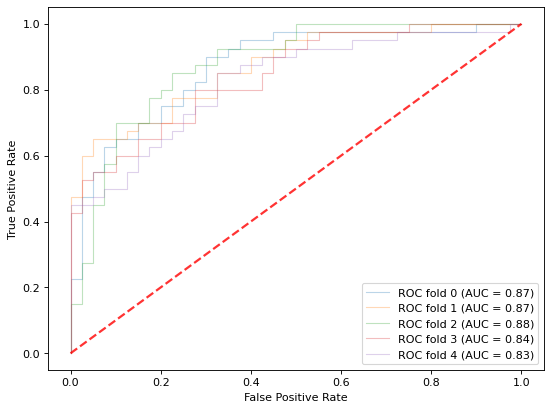

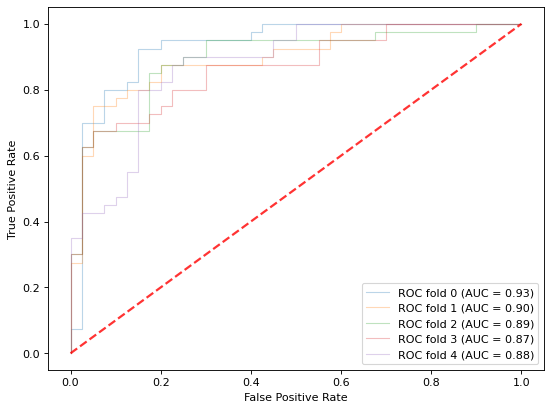

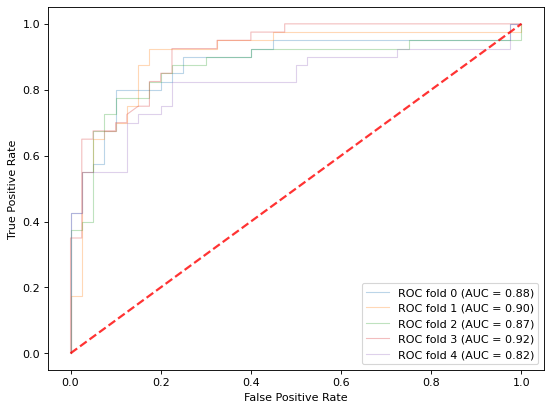

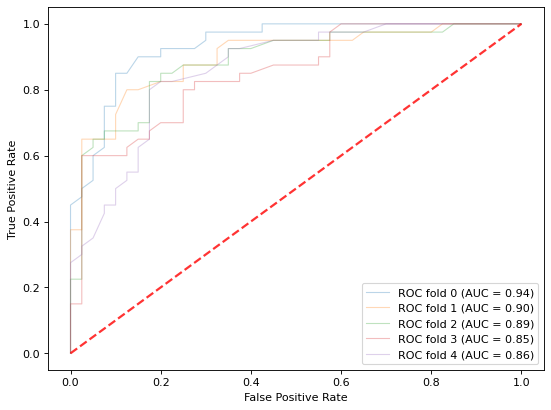

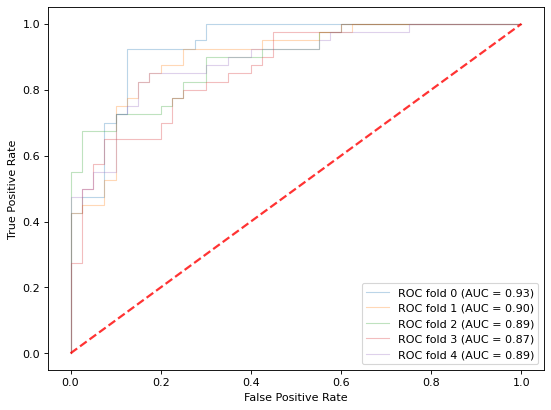

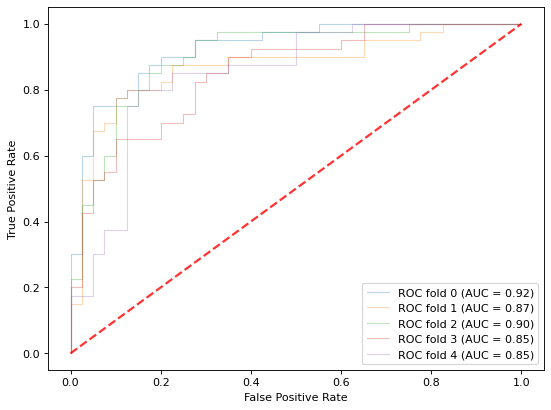

In [ ]:
# Drawing individual ROCs programmatically
# ROC-AUC function for all models and saving FPR TPR in a CSV file

import numpy as np
from sklearn.metrics import auc, plot_roc_curve
from matplotlib.font_manager import FontProperties

def calculate_auc(XX_train, yy_train, XX_test, yy_test, classifier):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

  i = 0
  for X_train, y_train, X_test, y_test in zip(XX_train, yy_train, XX_test, yy_test):
    classifier.fit(X_train, y_train)
    viz = plot_roc_curve(classifier, X_test, y_test, name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i = i+1

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  print('Mean AUC of:> {} is :> {:.3f}'.format(type(classifier).__name__, mean_auc*100))
  # ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
  # fontP = FontProperties()
  # fontP.set_size('xx-small')
  # ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title= "Receiver operating characteristic of "+ type(classifier).__name__)
  # plt.show()

  # np.savetxt(type(classifier).__name__+'mean_fpr_of_test.csv', mean_fpr, delimiter=",")
  # np.savetxt(type(classifier).__name__+'mean_tpr_of_test.csv', mean_tpr, delimiter=",")

models = get_models()
for clf in models:
  calculate_auc(XX_train, yy_train, XX_val, yy_val, clf)

In [ ]:
# Function to calculate various accuracies matrices

def cal_matrix(y_test, y_pred):
  precision = precision_score(y_test, y_pred, average="macro")
  recall = recall_score(y_test, y_pred, average="macro")
  f1score = f1_score(y_test, y_pred, average="macro")
  mse = metrics.mean_squared_error(y_test, y_pred)
  cnf_mat = confusion_matrix(y_test, y_pred)
  clf_report = classification_report(y_test, y_pred)
  return precision, recall, f1score, mse, cnf_mat, clf_report

# function for finding the maximum value and its index in an array
def find_max_val_and_index(list_):
  value = max(list_)
  index = list_.index(value)
  return value, index

In [ ]:
# Genetic algorithm

import random
import matplotlib.pyplot

# defining various steps required for the genetic algorithm
def initilization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(clf, population):
    scores = []
    for chromosome in population:
        clf.fit(X_train[:,chromosome],y_train)
        predictions = clf.predict(X_test[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0, len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    # print(population_nextgen)
    return population_nextgen

def generations(clf, size,n_feat,n_parents,mutation_rate,n_gen,X_train, X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(clf, population_nextgen)
        # print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

**Below are the separate code for each fold... code repetition is there because we want to save the results of each fold in seprate ipynb cell**

In [ ]:
# function for all - to 5 folds

def fold_n(X_train, y_train, X_val, y_val):
  models = get_models()
  list_test_acc, list_train_acc, list_val_acc, model_name = list(), list(), list(), list()
  for clf in models:
    model_name.append(type(clf).__name__)
    print('>%s: ' % (type(clf).__name__))

    chromo, score = generations(clf, size=200, n_feat=15, n_parents=100, mutation_rate=0.10, n_gen=38, 
                              X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val)
    clf.fit(X_train[:,chromo[-1]], y_train)
    predictions = clf.predict(X_val[:,chromo[-1]])
    print("Accuracy score after genetic algorithm is= "+ str(accuracy_score(y_val, predictions)))

    precision_val, recall_val, f1score_val, mse_val, cnf_mat_val, clf_report_val = cal_matrix(y_val, predictions)
    acc_train = clf.score(X_train[:,chromo[-1]], y_train)
    acc_val = clf.score(X_val[:,chromo[-1]], y_val)

    list_train_acc.append(acc_train)
    list_val_acc.append(acc_val)

    print('Accuracy Training set: {:.3f}'.format(acc_train*100))
    print('Accuracy Validation set: {:.3f}'.format(acc_val*100))
    # print('Precision: {:.3f}'.format(precision_val))
    # print('Recall: {:.3f}'.format(recall_val))
    # print('F1 Score: {:.3f}'.format(f1score_val))
    print("Validation set MSE:{}".format(mse_val))
    print(cnf_mat_val)
    # print(clf_report_val)

    # ------------ testing ----------------
    y_pred_test = clf.predict(X_test[:,chromo[-1]])
    precision_test, recall_test, f1score_test, mse_test, cnf_mat_test, clf_report_test = cal_matrix(y_test, y_pred_test)
    acc_test = clf.score(X_test[:,chromo[-1]], y_test)
    list_test_acc.append(acc_test)
    print('Accuracy Testing set: {:.3f}'.format(acc_test*100))
    # print('Precision of Test: {:.3f}'.format(precision_test))
    # print('Recall of Test: {:.3f}'.format(recall_test))
    # print('F1 Score of Test: {:.3f}'.format(f1score_test))
    print("Testing set MSE:{}".format(mse_test))
    print(cnf_mat_test)
    # print(clf_report_test) 
    print('--------------------------------')

  print('=================================')
  value, index = find_max_val_and_index(list_train_acc)
  print('highest train accuracy is for: {} : {:.3f}'.format(model_name[index],value*100))
  # print('All accuracies: ', list_train_acc)

  value, index = find_max_val_and_index(list_val_acc)
  print('highest val accuracy is for: {} : {:.3f}'.format(model_name[index],value*100))
  # print('All accuracies: ', list_val_acc)

  value, index = find_max_val_and_index(list_test_acc)
  print('highest test accuracy is for: {} : {:.3f}'.format(model_name[index],value*100))
  # print('All accuracies: ', list_test_acc)

  return list_train_acc, list_val_acc, list_test_acc

In [ ]:
# fold 1

start = datetime.now()
f1_train_acc, f1_val_acc, f1_test_acc = fold_n(X1_train, y1_train, X1_val, y1_val)
print("Total time taken is: ", datetime.now() - start)

# save
# np.save('/content/f1_train_acc.npy', f1_train_acc)
# np.save('/content/f1_val_acc.npy', f1_val_acc)
# np.save('/content/f1_test_acc.npy', f1_test_acc)

# load
f1_train_acc = np.load('/content/f1_train_acc.npy')
f1_val_acc = np.load('/content/f1_val_acc.npy')
f1_test_acc = np.load('/content/f1_test_acc.npy')

>LogisticRegression: 
Accuracy score after genetic algorithm is= 0.8875
Accuracy Training set: 82.812
Accuracy Validation set: 88.750
Validation set MSE:0.1125
[[35  5]
 [ 4 36]]
Accuracy Testing set: 88.750
Testing set MSE:0.1125
[[35  5]
 [ 4 36]]
--------------------------------
>RidgeClassifier: 
Accuracy score after genetic algorithm is= 0.85
Accuracy Training set: 80.312
Accuracy Validation set: 85.000
Validation set MSE:0.15
[[35  5]
 [ 7 33]]
Accuracy Testing set: 85.000
Testing set MSE:0.15
[[35  5]
 [ 7 33]]
--------------------------------
>SGDClassifier: 
Accuracy score after genetic algorithm is= 0.825
Accuracy Training set: 82.500
Accuracy Validation set: 82.500
Validation set MSE:0.175
[[31  9]
 [ 5 35]]
Accuracy Testing set: 82.500
Testing set MSE:0.175
[[31  9]
 [ 5 35]]
--------------------------------
>KNeighborsClassifier: 
Accuracy score after genetic algorithm is= 0.8375
Accuracy Training set: 78.125
Accuracy Validation set: 83.750
Validation set MSE:0.1625
[[35  

In [ ]:
# fold 2

start = datetime.now()
f2_train_acc, f2_val_acc, f2_test_acc = fold_n(X2_train, y2_train, X2_val, y2_val)
print("Total time taken is: ", datetime.now() - start)

# save
# np.save('/content/f2_train_acc.npy', f2_train_acc)
# np.save('/content/f2_val_acc.npy', f2_val_acc)
# np.save('/content/f2_test_acc.npy', f2_test_acc)

# load
f2_train_acc = np.load('/content/f2_train_acc.npy')
f2_val_acc = np.load('/content/f2_val_acc.npy')
f2_test_acc = np.load('/content/f2_test_acc.npy')

>LogisticRegression: 
Accuracy score after genetic algorithm is= 0.7875
Accuracy Training set: 79.375
Accuracy Validation set: 78.750
Validation set MSE:0.2125
[[32  8]
 [ 9 31]]
Accuracy Testing set: 85.000
Testing set MSE:0.15
[[36  4]
 [ 8 32]]
--------------------------------
>RidgeClassifier: 
Accuracy score after genetic algorithm is= 0.7125
Accuracy Training set: 78.125
Accuracy Validation set: 71.250
Validation set MSE:0.2875
[[29 11]
 [12 28]]
Accuracy Testing set: 77.500
Testing set MSE:0.225
[[30 10]
 [ 8 32]]
--------------------------------
>SGDClassifier: 
Accuracy score after genetic algorithm is= 0.625
Accuracy Training set: 67.188
Accuracy Validation set: 62.500
Validation set MSE:0.375
[[39  1]
 [29 11]]
Accuracy Testing set: 65.000
Testing set MSE:0.35
[[39  1]
 [27 13]]
--------------------------------
>KNeighborsClassifier: 
Accuracy score after genetic algorithm is= 0.725
Accuracy Training set: 82.188
Accuracy Validation set: 72.500
Validation set MSE:0.275
[[34  

In [ ]:
# fold 3

start = datetime.now()
f3_train_acc, f3_val_acc, f3_test_acc = fold_n(X3_train, y3_train, X3_val, y3_val)
print("Total time taken is: ", datetime.now() - start)

# save
np.save('/content/f3_train_acc.npy', f3_train_acc)
np.save('/content/f3_val_acc.npy', f3_val_acc)
np.save('/content/f3_test_acc.npy', f3_test_acc)

# load
# f3_train_acc = np.load('/content/f3_train_acc.npy')
# f3_val_acc = np.load('/content/f3_val_acc.npy')
# f3_test_acc = np.load('/content/f3_test_acc.npy')

>LogisticRegression: 
Accuracy score after genetic algorithm is= 0.8
Accuracy Training set: 81.875
Accuracy Validation set: 80.000
Validation set MSE:0.2
[[32  8]
 [ 8 32]]
Accuracy Testing set: 87.500
Testing set MSE:0.125
[[36  4]
 [ 6 34]]
--------------------------------
>RidgeClassifier: 
Accuracy score after genetic algorithm is= 0.6625
Accuracy Training set: 76.562
Accuracy Validation set: 66.250
Validation set MSE:0.3375
[[28 12]
 [15 25]]
Accuracy Testing set: 76.250
Testing set MSE:0.2375
[[29 11]
 [ 8 32]]
--------------------------------
>SGDClassifier: 
Accuracy score after genetic algorithm is= 0.8375
Accuracy Training set: 81.562
Accuracy Validation set: 83.750
Validation set MSE:0.1625
[[31  9]
 [ 4 36]]
Accuracy Testing set: 88.750
Testing set MSE:0.1125
[[32  8]
 [ 1 39]]
--------------------------------
>KNeighborsClassifier: 
Accuracy score after genetic algorithm is= 0.7625
Accuracy Training set: 83.750
Accuracy Validation set: 76.250
Validation set MSE:0.2375
[[34

In [ ]:
# fold 4

start = datetime.now()
f4_train_acc, f4_val_acc, f4_test_acc = fold_n(X4_train, y4_train, X4_val, y4_val)
print("Total time taken is: ", datetime.now() - start)

# save
np.save('/content/f4_train_acc.npy', f4_train_acc)
np.save('/content/f4_val_acc.npy', f4_val_acc)
np.save('/content/f4_test_acc.npy', f4_test_acc)

# load
# f4_train_acc = np.load('/content/f4_train_acc.npy')
# f4_val_acc = np.load('/content/f4_val_acc.npy')
# f4_test_acc = np.load('/content/f4_test_acc.npy')

>LogisticRegression: 
Accuracy score after genetic algorithm is= 0.8125
Accuracy Training set: 81.250
Accuracy Validation set: 81.250
Validation set MSE:0.1875
[[34  6]
 [ 9 31]]
Accuracy Testing set: 88.750
Testing set MSE:0.1125
[[36  4]
 [ 5 35]]
--------------------------------
>RidgeClassifier: 
Accuracy score after genetic algorithm is= 0.85
Accuracy Training set: 83.438
Accuracy Validation set: 85.000
Validation set MSE:0.15
[[35  5]
 [ 7 33]]
Accuracy Testing set: 88.750
Testing set MSE:0.1125
[[34  6]
 [ 3 37]]
--------------------------------
>SGDClassifier: 
Accuracy score after genetic algorithm is= 0.65
Accuracy Training set: 69.062
Accuracy Validation set: 65.000
Validation set MSE:0.35
[[18 22]
 [ 6 34]]
Accuracy Testing set: 65.000
Testing set MSE:0.35
[[17 23]
 [ 5 35]]
--------------------------------
>KNeighborsClassifier: 
Accuracy score after genetic algorithm is= 0.7375
Accuracy Training set: 81.250
Accuracy Validation set: 73.750
Validation set MSE:0.2625
[[31  9

In [ ]:
# fold 5

start = datetime.now()
f5_train_acc, f5_val_acc, f5_test_acc = fold_n(X5_train, y5_train, X5_val, y5_val)
print("Total time taken is: ", datetime.now() - start)

# save
np.save('/content/f5_train_acc.npy', f5_train_acc)
np.save('/content/f5_val_acc.npy', f5_val_acc)
np.save('/content/f5_test_acc.npy', f5_test_acc)

# load
# f5_train_acc = np.load('/content/f5_train_acc.npy')
# f5_val_acc = np.load('/content/f5_val_acc.npy')
# f5_test_acc = np.load('/content/f5_test_acc.npy')

>LogisticRegression: 
Accuracy score after genetic algorithm is= 0.8125
Accuracy Training set: 84.375
Accuracy Validation set: 81.250
Validation set MSE:0.1875
[[34  6]
 [ 9 31]]
Accuracy Testing set: 88.750
Testing set MSE:0.1125
[[34  6]
 [ 3 37]]
--------------------------------
>RidgeClassifier: 
Accuracy score after genetic algorithm is= 0.775
Accuracy Training set: 84.375
Accuracy Validation set: 77.500
Validation set MSE:0.225
[[32  8]
 [10 30]]
Accuracy Testing set: 90.000
Testing set MSE:0.1
[[35  5]
 [ 3 37]]
--------------------------------
>SGDClassifier: 
Accuracy score after genetic algorithm is= 0.5875
Accuracy Training set: 65.000
Accuracy Validation set: 58.750
Validation set MSE:0.4125
[[ 9 31]
 [ 2 38]]
Accuracy Testing set: 68.750
Testing set MSE:0.3125
[[15 25]
 [ 0 40]]
--------------------------------
>KNeighborsClassifier: 
Accuracy score after genetic algorithm is= 0.7625
Accuracy Training set: 80.938
Accuracy Validation set: 76.250
Validation set MSE:0.2375
[[

In [ ]:
# adding all fold accuracies for further analysis
# f5_train_acc, f5_val_acc, f5_test_acc

sum_train_acc = np.array([sum(x) for x in zip(f1_train_acc, f2_train_acc, f3_train_acc, f4_train_acc, f5_train_acc)])/5
sum_val_acc   = np.array([sum(x) for x in zip(f1_val_acc, f2_val_acc, f3_val_acc, f4_val_acc, f5_val_acc)])/5
sum_test_acc  = np.array([sum(x) for x in zip(f1_test_acc, f2_test_acc, f3_test_acc, f4_test_acc, f5_test_acc)])/5


def max_acc_classifires(arr):
  value = max(arr)
  index = np.where(np.isclose(arr, value))[0]
  model_list = [model_name[i] for i in index]
  print('Heighest acc models is/are {} with max accuracy {:.3f}'.format(model_list, value*100),'% \n')

print('5 fold max avg Training acc:> ')
max_acc_classifires(sum_train_acc)
print('5 fold max avg  Validation acc:> ')
max_acc_classifires(sum_val_acc)
print('5 fold max avg  Testing acc:> ')
max_acc_classifires(sum_test_acc)

5 fold max avg Training acc:> 
Heighest acc models is/are ['DecisionTreeClassifier', 'SVC', 'RandomForestClassifier'] with max accuracy 100.000 % 

5 fold max avg  Validation acc:> 
Heighest acc models is/are ['LogisticRegression'] with max accuracy 82.250 % 

5 fold max avg  Testing acc:> 
Heighest acc models is/are ['RidgeClassifier'] with max accuracy 83.261 % 



In [ ]:
# same cross vaildation data among three experiments
cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
# Now this 5-fold cross validation and testing using loop in one go

models = get_models()
list_test = list()
for clf in models:
  list_train, list_val, list_precision, list_recall, list_f1score, list_clf = list(), list(), list(), list(), list(), list()
  MSE = []
  np_array_cnf_mat = np.zeros(shape=(2,2))
  i=0
  print('>%s: ' % (type(clf).__name__))
  print('------------------------')
  for train, validate in cv.split(X, y):
    clf.fit(X[train], y[train])
    y_pred = clf.predict(X[validate])
    
    precision = precision_score(y[validate], y_pred, average="macro")
    recall = recall_score(y[validate], y_pred, average="macro")
    f1score = f1_score(y[validate], y_pred, average="macro")
    mse = metrics.mean_squared_error(y[validate], y_pred)
    
    acc_train = clf.score(X[train], y[train])
    acc_val = clf.score(X[validate], y[validate])

    list_clf.append(clf)
    list_train.append(acc_train)
    list_val.append(acc_val)
    list_precision.append(precision)
    list_recall.append(recall)
    list_f1score.append(f1score)

    # print('fold {} Precision: {:.3f}'.format(i+1, precision))
    # print('fold {} Recall: {:.3f}'.format(i+1, recall))
    # print('fold {} F1 Score: {:.3f}'.format(i+1, f1score))
    # print('fold {} Accuracy Training set: {:.3f}'.format(i+1, acc_train))
    # print('fold {} Accuracy Validation set: {:.3f}'.format(i+1, acc_val))

    MSE.append(mse)
    # print("Validation set MSE for fold {} :{}".format(i+1, MSE[i]), '\n')
    cnf_mat = confusion_matrix(y[validate], y_pred)
    print(cnf_mat)
    np_array_cnf_mat = np.add(np_array_cnf_mat, cnf_mat)
    # print(classification_report(y[validate], y_pred))
    i = i+1

# ----------best clf testing-----------------------------
  index_best_model = np.argmax(list_val)
  print('best validatin accuracy out of 5 fold:>', list_val[index_best_model])
  clf_best = list_clf[index_best_model]
  y_pred_test = clf_best.predict(X_test)
  precision_test = precision_score(y_test, y_pred_test, average="macro")
  recall_test = recall_score(y_test, y_pred_test, average="macro")
  f1score_test = f1_score(y_test, y_pred_test, average="macro")
  mse_test = metrics.mean_squared_error(y_test, y_pred_test)
  cnf_mat_test = confusion_matrix(y_test, y_pred_test)
  acc_test = clf_best.score(X_test, y_test)
  list_test.append(acc_test)
  print(classification_report(y_test, y_pred_test))
  print('Accuracy Test set: {:.3f}'.format(acc_test*100))
  print('Precision Test set: {:.3f}'.format(precision_test*100))
  print('Recall Test set: {:.3f}'.format(recall_test*100))
  print('F1 score Test set: {:.3f}'.format(f1score_test*100))
  print(cnf_mat_test)
  print("Training set MSE:{:.3f}".format(mse_test), '\n')
# ------------------------------------------------------------

  # print('==========================================================')
  # print('Sum confusion matrix:> \n', np_array_cnf_mat)
  # print('mean confusion matrix:> \n', np_array_cnf_mat/5)
  # print('mean acc training:> {:.3f}'.format(np.mean(list_train)*100), '\n')
  # print('Validation Accuracy:> {}'.format(list_val))
  # print('mean acc validation:> {:.3f}'.format(np.mean(list_val)*100))
  # print("Mean MSE for {}-fold cross validation : {:.3f}".format(len(MSE), np.mean(MSE)))

  # print('Precision list:>', list_precision)
  # print('mean acc precision:>', np.mean(list_precision)*100)
  # print('Recall list:>', list_recall)
  # print('mean acc recall:>', np.mean(list_recall)*100)
  # print('F1 score list:>', list_f1score)
  # print('mean acc f1 score:>', np.mean(list_f1score)*100, '\n')

max_value = max(list_test)
max_index = list_test.index(max_value)
print('highest accuracy is for: ', model_name[max_index],':', max_value)
print('All accuracies: ', list_test)

In [ ]:
# ROC-AUC function for all models

import numpy as np
from sklearn.metrics import auc, plot_roc_curve

def calculate_auc(cv, classifier):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = plot_roc_curve(classifier, X[test], y[test], name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  # print('mean AUC:>',mean_auc)
  return mean_auc

In [ ]:
# Edited version by Manoj
# correlation between test harness and ideal test condition, only 5 fold cross validation and not LOOCV

tic = time.time()
def evaluate_model(cv, model):
  scoring = ['precision', 'recall', 'f1', 'accuracy']
  scores = cross_validate(model, X, y, cv=cv, scoring = scoring, return_train_score=False)
  return scores

models = get_models()
ideal_results, cv_results, model_name, times = list(), list(), list(), list()

i = 1
for model in models:
  t1 = time.time()
  scores = evaluate_model(cv, model)

  cv_mean = mean(scores['test_accuracy'])*100
  cv_min = scores['test_accuracy'].min()*100
  cv_max = scores['test_accuracy'].max()*100

  cv_f1 = scores['test_f1']
  cv_precision = scores['test_precision']
  cv_recall = scores['test_recall']

  t2 = time.time()
  t = (t2-t1)
  times.append(t)
  cv_results.append(cv_mean)
  model_name.append(type(model).__name__)
  print(i,'>%s: cv=%.3f, time=%.3f sec' % (type(model).__name__, cv_mean, t))
  # print('> folds=%d, avg accuracy=%.3f (%.3f, %.3f)' % (k, cv_mean, cv_min, cv_max),'\n')

  # print('accuracy:>',scores['test_accuracy'])
  # print('mean Accuracy:>',mean(scores['test_accuracy'])*100,'\n')
  # print('precision:>', cv_precision)
  print('mean precision:> {:.3f}'.format(mean(cv_precision)*100))
  # print('recall:>', cv_recall)
  print('mean recall:> {:.3f}'.format(mean(cv_recall)*100))
  # print('f1 score:>', cv_f1)
  print('mean f1 score:> {:.3f}'.format(mean(cv_f1)*100))
  mean_auc = calculate_auc(cv, model)
  print('mean AUC (area under the curve):> {:.3f}'.format(mean_auc))
  print('--------------------------------------------','\n')
  i = i+1

max_value = max(cv_results)
max_index = cv_results.index(max_value)
print('highest accuracy is for: ', model_name[max_index],':', max_value)
print('All accuracies: ', cv_results)

toc = time.time()
print('time: ', (toc-tic)/60, ' minutes')

In [ ]:
# Correlation between test harness and ideal test condition

tic = time.time()
def evaluate_model(cv, model):
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return mean(scores)

ideal_cv = LeaveOneOut()
models = get_models()
ideal_results, cv_results, model_name, times = list(), list(), list(), list()

i = 1
for model in models:
	t1 = time.time()
	cv_mean = evaluate_model(cv, model)*100
	t2 = time.time()
	t = (t2-t1)
	times.append(t)
	ideal_mean = evaluate_model(ideal_cv, model)*100
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	model_name.append(type(model).__name__)
	print(i, '>%s:'%(type(model).__name__))
	print('cv=%.3f, ideal=%.3f, time=%.3f sec' % (cv_mean, ideal_mean, t), '\n')
	i = i+1

max_value = max(cv_results)
max_index = cv_results.index(max_value)
print(' \n highest accuracy is for: ', model_name[max_index],':',max_value)
corr, _ = pearsonr(cv_results, ideal_results)
print(' Correlation: %.3f' % corr)
print('All accuracies: ', cv_results)

print('mean accuracy for LOOCV', ideal_results, '\n')
print('mean accuracy for 5-fold', cv_results, '\n')
toc = time.time()
print('time: ', (toc-tic)/60, ' minutes')

In [ ]:
# only LOOCV Results

def evaluate_model(cv, model):
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return mean(scores)

ideal_cv = LeaveOneOut()
models = get_models()
ideal_results, model_name = list(), list()

for model in models:
	ideal_mean = evaluate_model(ideal_cv, model)*100
	ideal_results.append(ideal_mean)
	print('>%s ideal=%.3f:'%(type(model).__name__, ideal_mean))

print('mean accuracy for LOOCV', ideal_results, '\n')

In [ ]:
# printing all considered models, their average 5 fold ideal and LOOCV accuracies for all 12 ML models

models = data['Classifire'].values
cv_results = data['mean 5 foldCV'].values
ideal_results = data['mean LOOCV 100 percent old'].values

print(models)
print('ideal_results:> ', ideal_results)
print('cv_results:> ', cv_results)

corr, p_value = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
print('P-Value: %.3f' % p_value)

['LogisticRegression ' 'RidgeClassifier ' 'SGDClassifier '
 'KNeighborsClassifier ' 'DecisionTreeClassifier ' 'LinearSVC ' 'SVC '
 'GaussianNB ' 'AdaBoostClassifier ' 'RandomForestClassifier '
 'GradientBoostingClassifier ' 'QuadraticDiscriminantAnalysis ']
ideal_results:>  [81.911 81.301 73.78  73.171 75.203 81.707 76.626 82.317 84.35  78.862
 81.911 80.081]
cv_results:>  [82.25 81.5  63.5  73.   75.25 80.75 74.25 81.75 80.5  79.75 81.75 80.5 ]
Correlation: 0.848
P-Value: 0.000


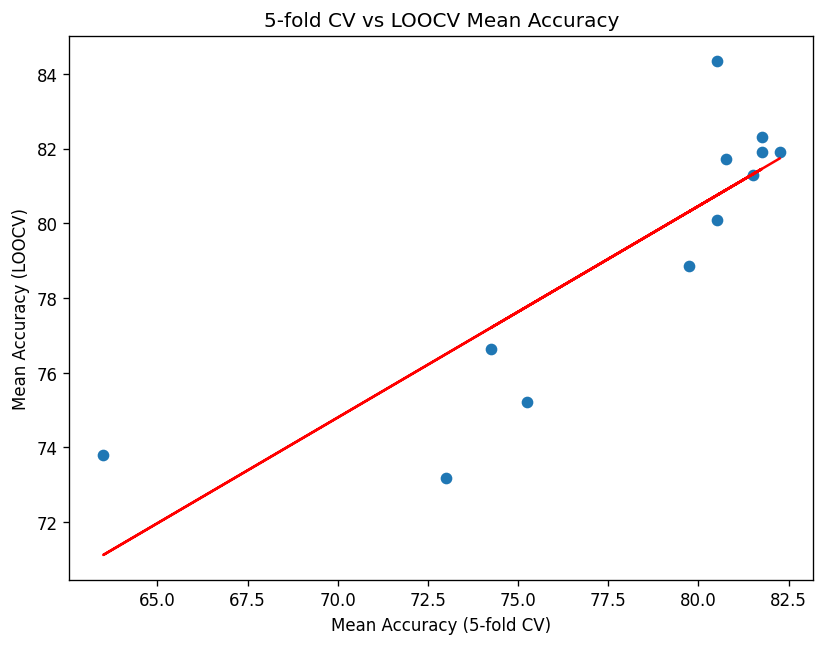

In [ ]:
# plotting the 5 fold Vs LOOCV mean accuracy curve

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
pyplot.scatter(cv_results, ideal_results)
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
pyplot.title('5-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (5-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
pyplot.show()